<div style="font-size: 45px; font-weight: bold; color: purple; text-transform: uppercase; background-color: white; border: 0px solid blue; padding: 5px 10px; display: inline-block; border-radius: 10px; width:1000px; text-align:center">
    ICC Men's T20 World Cup 2024 Analysis
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [3]:
matches.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2024,Canada,United States of America,01-06-2024,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,RK Illingworth,Sharfuddoula,L Rusere,RB Richardson,United States of America,NaN,7.0,Group
1,2024,Papua New Guinea,West Indies,02-06-2024,2,Providence Stadium,Providence,West Indies,field,RL Chase,AT Holdstock,Rashid Riaz,HDPK Dharmasena,AJ Pycroft,West Indies,NaN,5.0,Group
2,2024,Oman,Namibia,02-06-2024,3,Kensington Oval,Bridgetown,Namibia,field,D Wiese,J Madanagopal,JS Wilson,Asif Yaqoob,RS Madugalle,Namibia,NaN,NaN,Group
3,2024,Sri Lanka,South Africa,03-06-2024,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,CM Brown,RA Kettleborough,AG Wharf,JJ Crowe,South Africa,NaN,6.0,Group
4,2024,Afghanistan,Uganda,03-06-2024,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Ahsan Raza,HDPK Dharmasena,Rashid Riaz,AJ Pycroft,Afghanistan,125.0,NaN,Group


In [4]:
deliveries.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2024,01-06-2024,"Grand Prairie Stadium, Dallas",1,0.1,Canada,United States of America,A Johnson,NS Dhaliwal,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024,01-06-2024,"Grand Prairie Stadium, Dallas",1,0.2,Canada,United States of America,A Johnson,NS Dhaliwal,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2024,01-06-2024,"Grand Prairie Stadium, Dallas",1,0.3,Canada,United States of America,A Johnson,NS Dhaliwal,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,1,2024,01-06-2024,"Grand Prairie Stadium, Dallas",1,0.4,Canada,United States of America,NS Dhaliwal,A Johnson,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2024,01-06-2024,"Grand Prairie Stadium, Dallas",1,0.5,Canada,United States of America,NS Dhaliwal,A Johnson,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
matches.shape

(52, 18)

In [6]:
deliveries.shape

(11472, 22)

In [7]:
print(matches.columns)

Index(['season', 'team1', 'team2', 'date', 'match_number', 'venue', 'city',
       'toss_winner', 'toss_decision', 'player_of_match', 'umpire1', 'umpire2',
       'reserve_umpire', 'match_referee', 'winner', 'winner_runs',
       'winner_wickets', 'match_type'],
      dtype='object')


In [8]:
print(deliveries.columns)

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')


<div style="font-size: 45px; font-weight: bold; color: blue; text-transform: uppercase; background-color: white; border: 0px solid blue; padding: 5px 10px; display: inline-block; border-radius: 10px; width:1010px; text-align:center">
    Team Records
</div>

In [9]:
toss_match_outcome = matches[matches['toss_winner'] == matches['winner']]

toss_win_and_match_win_count = toss_match_outcome.shape[0]
total_matches_count = matches.shape[0]

print(f"Toss winner won the match {toss_win_and_match_win_count} times out of {total_matches_count} matches.")

Toss winner won the match 28 times out of 52 matches.


In [10]:
batting_first = matches[matches['toss_decision'] == 'bat']
chasing_target = matches[matches['toss_decision'] == 'field']

batting_first_win_percentage = (batting_first[batting_first['winner'] == batting_first['team1']].shape[0] / batting_first.shape[0]) * 100
chasing_win_percentage = (chasing_target[chasing_target['winner'] == chasing_target['team2']].shape[0] / chasing_target.shape[0]) * 100

print(f"Win percentage batting first: {batting_first_win_percentage:.2f}%")
print(f"Win percentage chasing target: {chasing_win_percentage:.2f}%")

Win percentage batting first: 50.00%
Win percentage chasing target: 54.76%


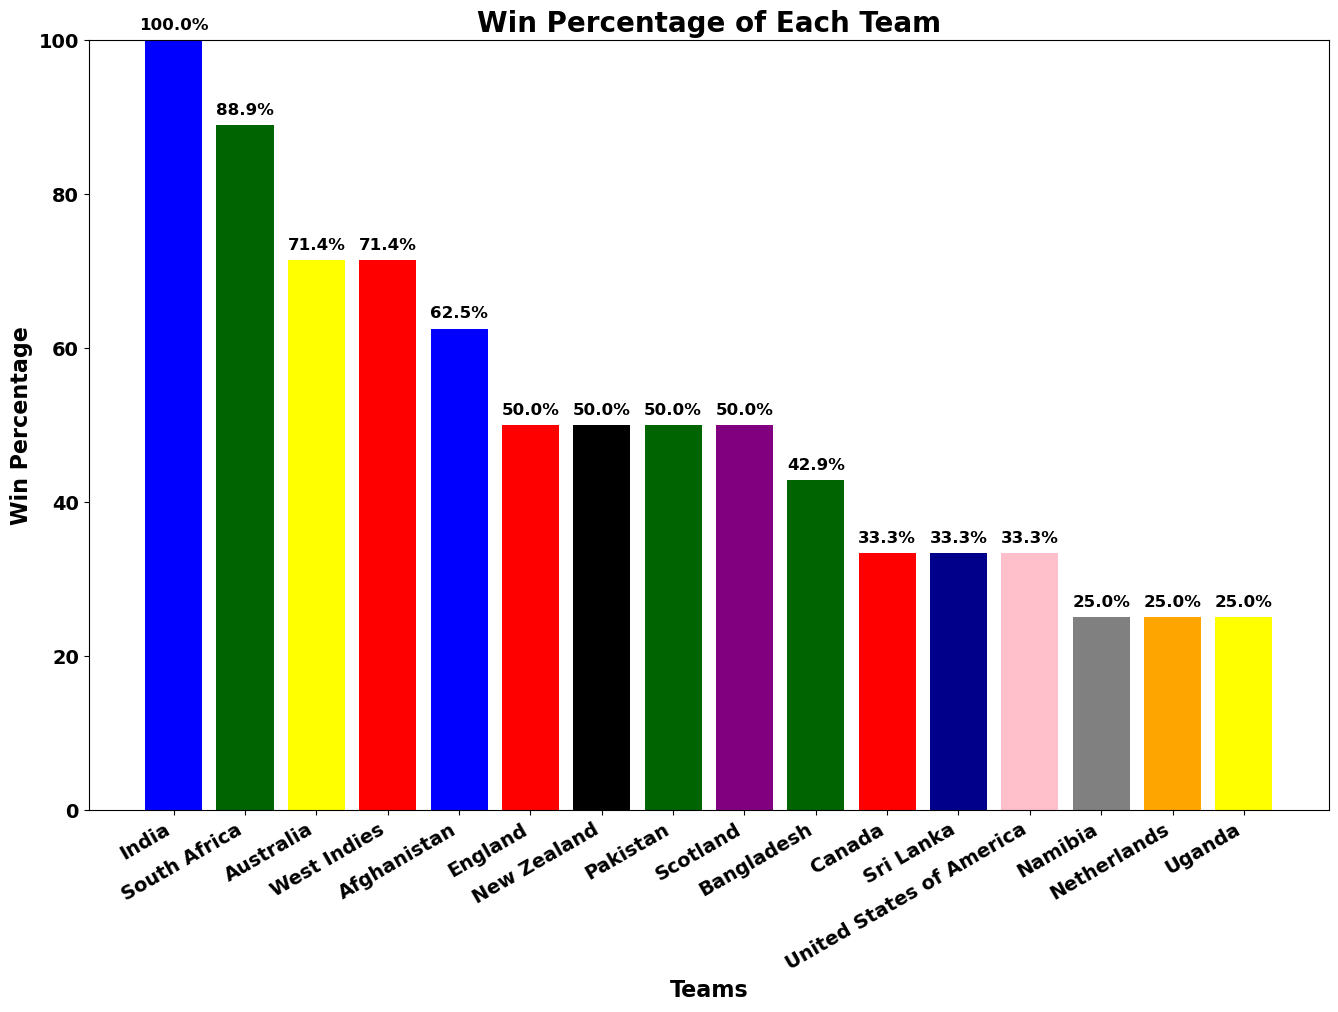

In [11]:
all_teams = pd.concat([matches['team1'], matches['team2']])
total_matches = all_teams.value_counts()
team_wins = matches['winner'].value_counts()

win_percentage = (team_wins / total_matches) * 100
win_percentage_sorted = win_percentage.sort_values(ascending=False)
win_percentage_sorted = win_percentage_sorted[win_percentage_sorted > 0]

country_colors = {'India': 'blue','Afghanistan': 'blue','Uganda': 'yellow','Australia': 'yellow','New Zealand': 'black',
                 'South Africa': 'darkgreen','Pakistan': 'darkgreen','Bangladesh': 'darkgreen','West Indies': 'red',
                 'Scotland': 'purple','Netherlands': 'orange','United States of America': 'pink','Sri Lanka': 'darkblue',
                 'Canada': 'red','England': 'red'}

colors = [country_colors.get(team, 'gray') for team in win_percentage_sorted.index]
plt.figure(figsize=(16, 10))
bars = plt.bar(win_percentage_sorted.index, win_percentage_sorted, color=colors)

plt.xlabel('Teams', fontsize=16, weight='bold')
plt.ylabel('Win Percentage', fontsize=16, weight='bold')
plt.title('Win Percentage of Each Team', fontsize=20, weight='bold')
plt.xticks(rotation=30, ha='right', fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')
plt.ylim(0, 100)

for bar, percentage in zip(bars, win_percentage_sorted):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.1f}%', 
            ha='center', va='bottom', fontsize=12, weight='bold')

plt.show()

In [12]:
victories_by_runs = matches[matches['winner_runs'].notna()]

largest_victories = victories_by_runs.sort_values(by='winner_runs', ascending=False).head(10)

print('Top victories by runs')
print(largest_victories[['winner', 'winner_runs', 'team1', 'team2']])

Top victories by runs
         winner  winner_runs        team1        team2
17  West Indies        134.0  West Indies       Uganda
4   Afghanistan        125.0  Afghanistan       Uganda
36  West Indies        104.0  West Indies  Afghanistan
13  Afghanistan         84.0  Afghanistan  New Zealand
34    Sri Lanka         83.0    Sri Lanka  Netherlands
50        India         68.0        India      England
43        India         50.0        India   Bangladesh
39        India         47.0        India  Afghanistan
30      England         41.0      England      Namibia
9     Australia         39.0    Australia         Oman


In [13]:
wicket_victories = matches[matches['winner_wickets'].notnull()]

largest_wicket_victories = wicket_victories.sort_values(by='winner_wickets', ascending=False).head(10)
print('Top victories by wickets')
print(largest_wicket_victories[['winner', 'winner_wickets', 'team1', 'team2']])

Top victories by wickets
          winner  winner_wickets                     team1         team2
45       England            10.0  United States of America       England
49  South Africa             9.0               Afghanistan  South Africa
22     Australia             9.0                   Namibia     Australia
42   West Indies             9.0  United States of America   West Indies
29   New Zealand             9.0                    Uganda   New Zealand
7          India             8.0                   Ireland         India
38       England             8.0               West Indies       England
26       England             8.0                      Oman       England
35   New Zealand             7.0          Papua New Guinea   New Zealand
27   Afghanistan             7.0          Papua New Guinea   Afghanistan


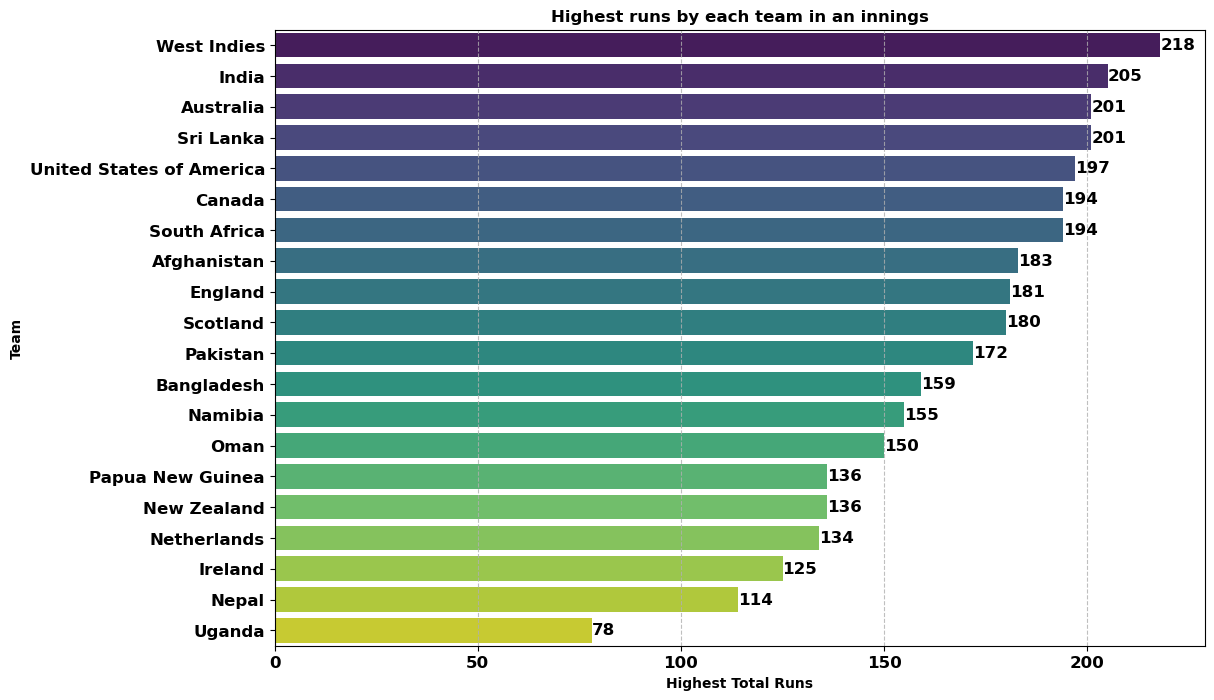

In [14]:
deliveries['total_runs'] = (
    deliveries['runs_off_bat'] +
    deliveries['extras'].fillna(0)
)

total_runs_df = deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

highest_totals = total_runs_df.groupby('batting_team')['total_runs'].max().reset_index()

highest_totals = highest_totals.sort_values(by='total_runs', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=highest_totals, x='total_runs', y='batting_team', palette='viridis')

plt.xlabel('Highest Total Runs', weight='bold')
plt.ylabel('Team', weight='bold')
plt.title('Highest runs by each team in an innings', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.8)

for index, value in enumerate(highest_totals['total_runs']):
    plt.text(value, index, f'{value}', color='black', va="center", fontsize=12, weight='bold')
    
plt.show()

In [15]:
matches_won_by_runs = matches.dropna(subset=['winner_runs'])
matches_won_by_wickets = matches.dropna(subset=['winner_wickets'])

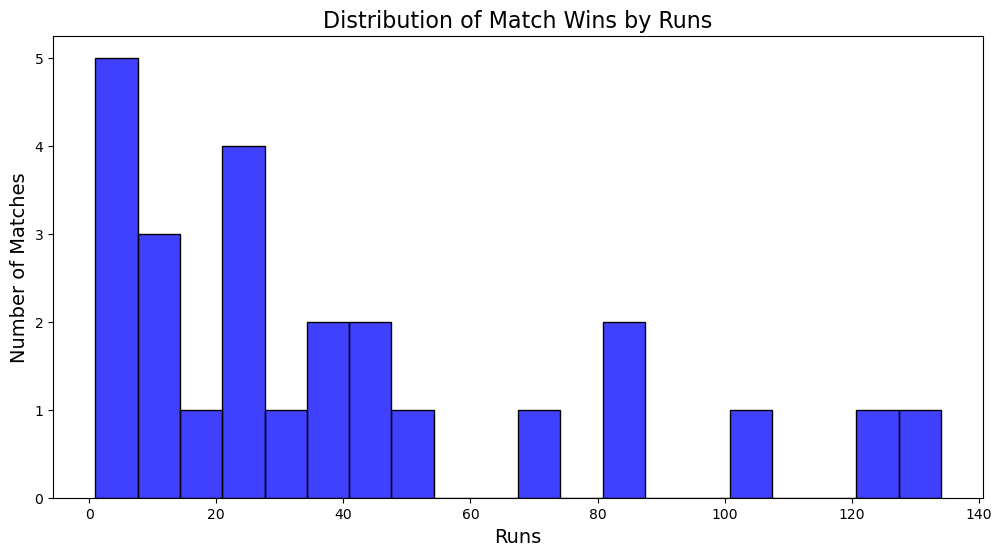

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(matches_won_by_runs['winner_runs'],color='blue', bins=20)
plt.title("Distribution of Match Wins by Runs", fontsize=16)
plt.xlabel("Runs", fontsize=14)
plt.ylabel("Number of Matches", fontsize=14)
plt.show()

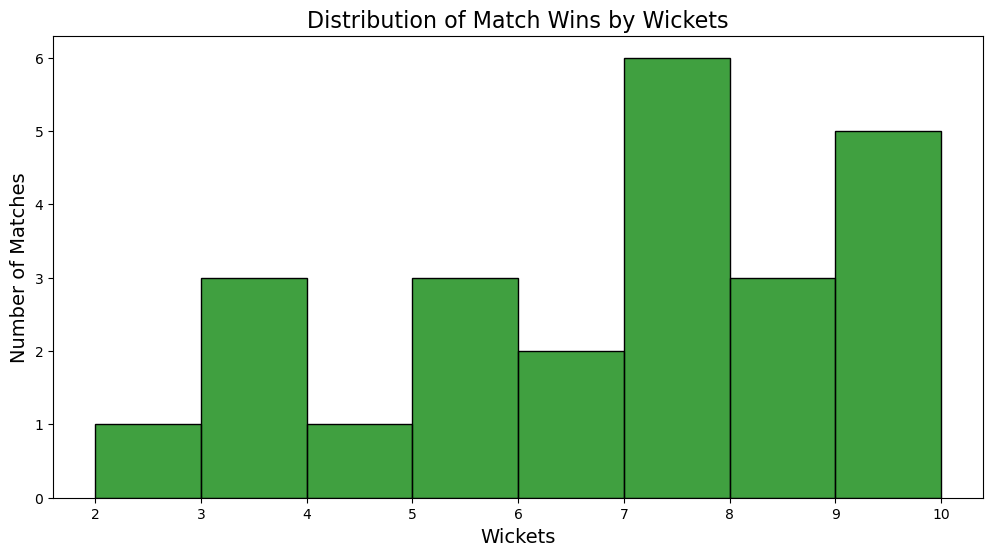

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(matches_won_by_wickets['winner_wickets'],color='green', bins=8)
plt.title("Distribution of Match Wins by Wickets", fontsize=16)
plt.xlabel("Wickets", fontsize=14)
plt.ylabel("Number of Matches", fontsize=14)
plt.show()

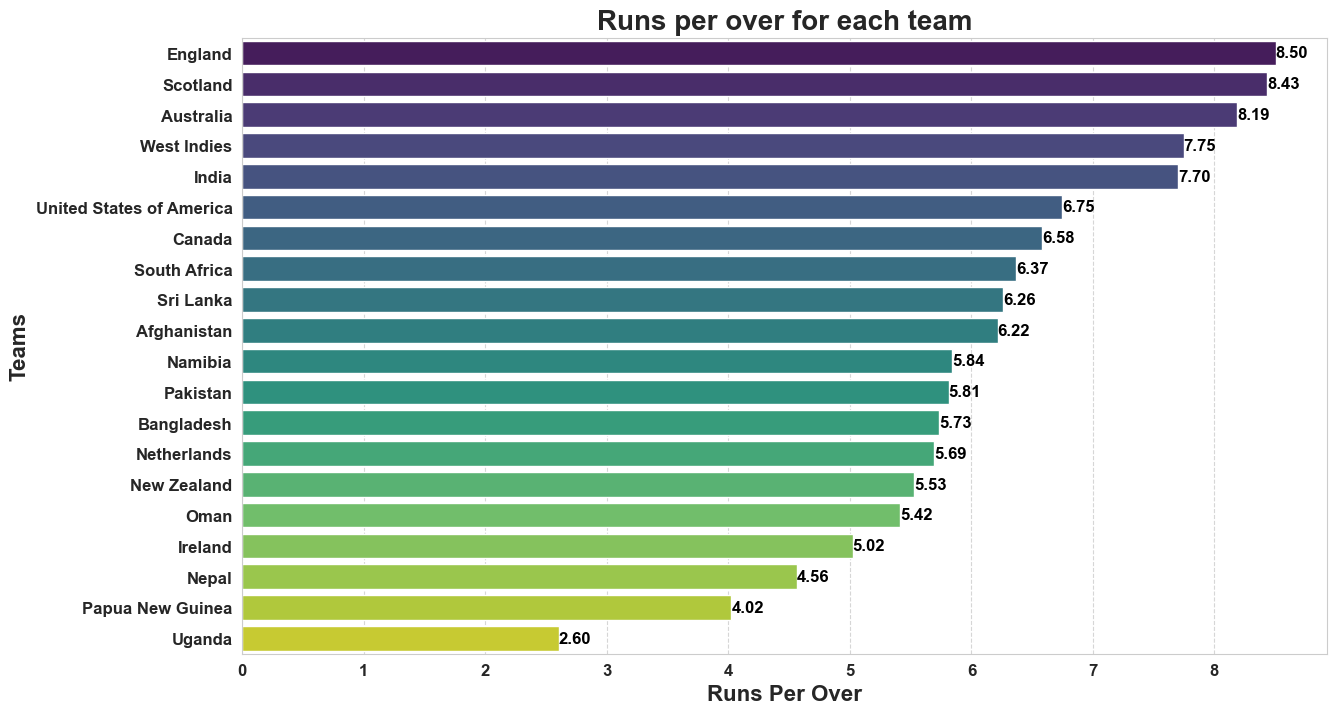

In [18]:
team_runs = deliveries.groupby('batting_team')['runs_off_bat'].sum()
team_balls = deliveries.groupby('batting_team').size()

runs_per_over = team_runs / (team_balls / 6)
most_runs_per_over = runs_per_over.sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=most_runs_per_over.values, y=most_runs_per_over.index, palette='viridis')
plt.title('Runs per over for each team', fontsize=20, weight='bold')
plt.xlabel('Runs Per Over', fontsize=16, weight='bold')
plt.ylabel('Teams', fontsize=16, weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.8)

for index, value in enumerate(most_runs_per_over.values):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.show()

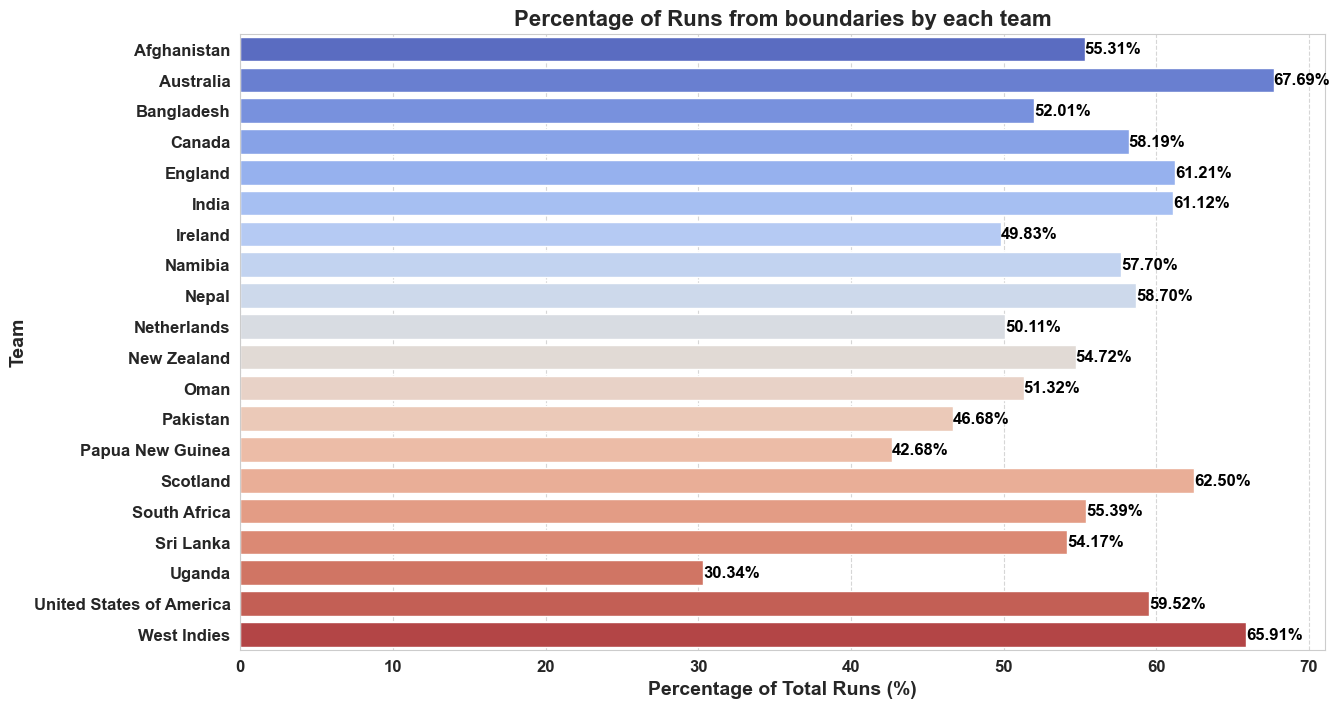

In [19]:
team_boundaries_4 = deliveries[deliveries['runs_off_bat'] == 4].groupby('batting_team').size()
team_boundaries_6 = deliveries[deliveries['runs_off_bat'] == 6].groupby('batting_team').size()

team_boundaries = pd.DataFrame({
    '4s': team_boundaries_4,
    '6s': team_boundaries_6
}).fillna(0)

team_total_runs = deliveries.groupby('batting_team')['runs_off_bat'].sum()

team_boundaries['boundary_runs'] = team_boundaries['4s'] * 4 + team_boundaries['6s'] * 6
team_boundaries['boundary_percentage'] = (team_boundaries['boundary_runs'] / team_total_runs) * 100

plt.figure(figsize=(14, 8))
sns.barplot(x=team_boundaries['boundary_percentage'], y=team_boundaries.index, palette="coolwarm")
plt.title("Percentage of Runs from boundaries by each team", fontsize=16, weight='bold')
plt.xlabel("Percentage of Total Runs (%)", fontsize=14, weight='bold')
plt.ylabel("Team", fontsize=14, weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.8)

for index, value in enumerate(team_boundaries['boundary_percentage']):
    plt.text(value, index, f'{value:.2f}%', color='black', va="center", fontsize=12, weight='bold')
    
plt.show()


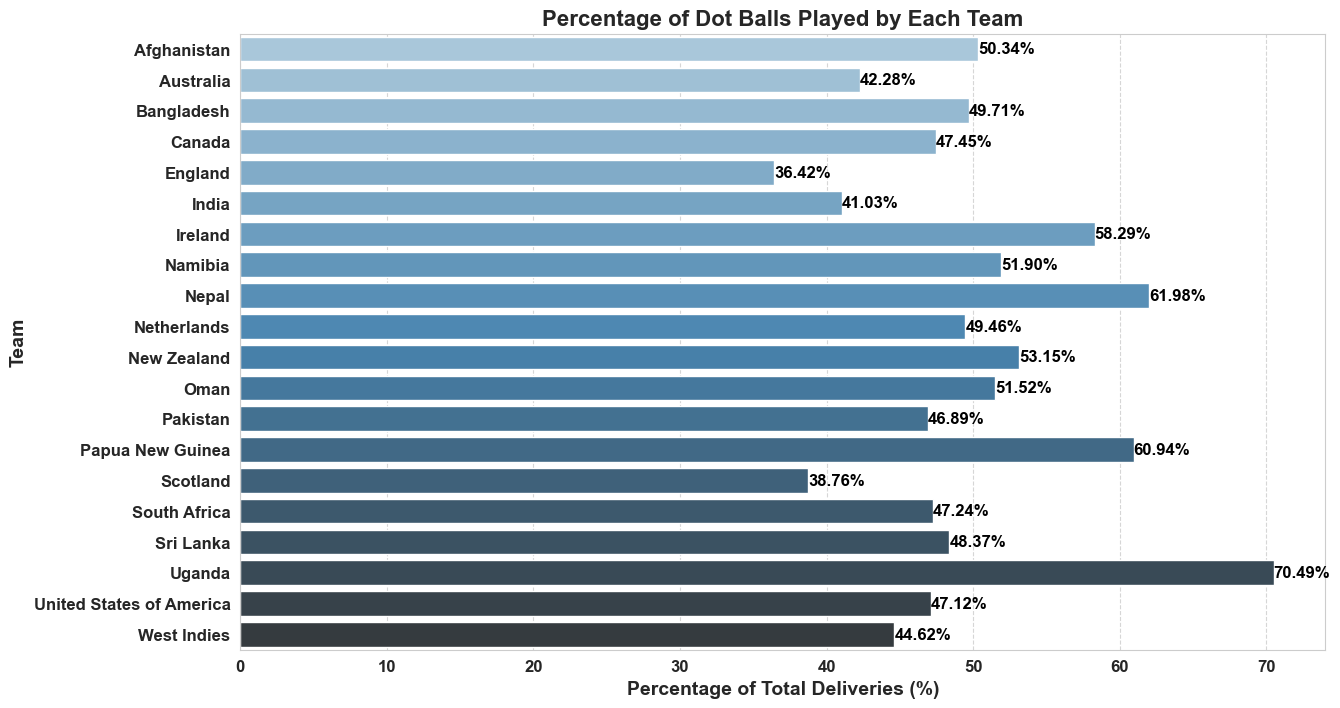

In [20]:
team_dot_balls = deliveries[deliveries['runs_off_bat'] == 0].groupby('batting_team').size()

team_total_deliveries = deliveries.groupby('batting_team').size()

team_dot_ball_percentage = (team_dot_balls / team_total_deliveries) * 100

dot_ball_df = pd.DataFrame({
    'dot_ball_percentage': team_dot_ball_percentage
}).reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='dot_ball_percentage', y='batting_team', data=dot_ball_df, palette="Blues_d")
plt.title("Percentage of Dot Balls Played by Each Team", fontsize=16, weight='bold')
plt.xlabel("Percentage of Total Deliveries (%)", fontsize=14, weight='bold')
plt.ylabel("Team", fontsize=14, weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.8)

for index, value in enumerate(dot_ball_df['dot_ball_percentage']):
    plt.text(value, index, f'{value:.2f}%', color='black', va="center", fontsize=12, weight='bold')
    
plt.show()

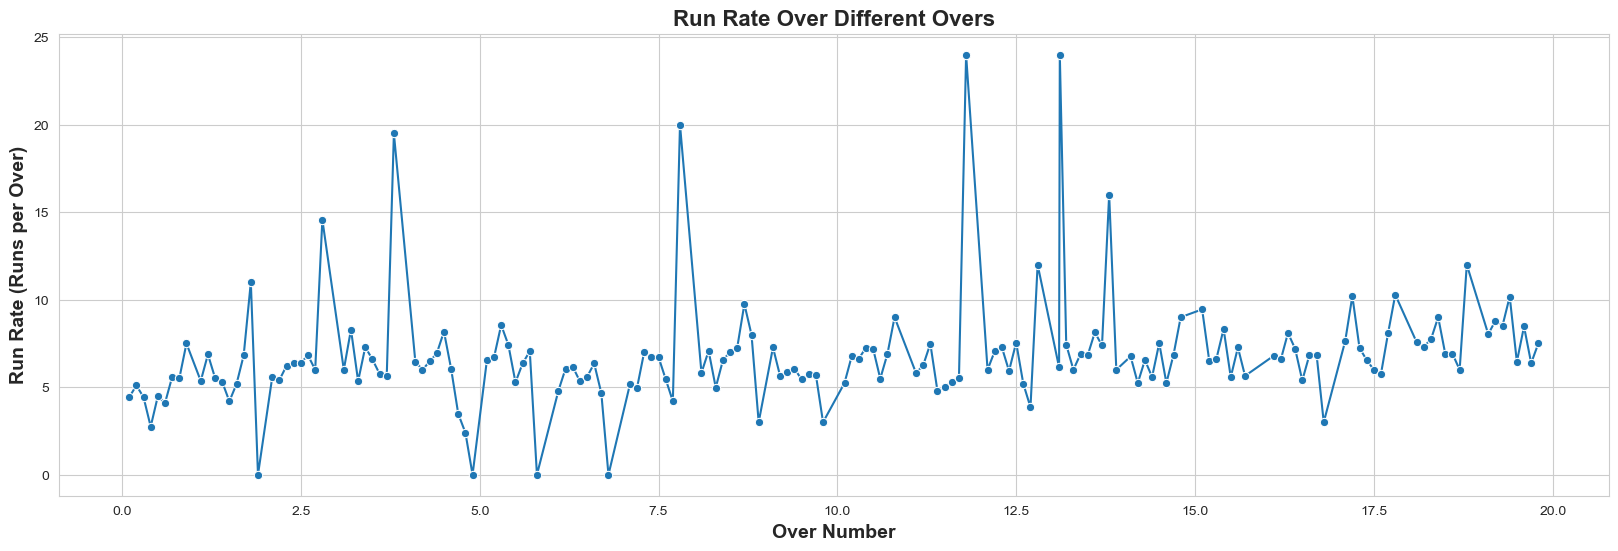

In [21]:
overs_data = deliveries.groupby('ball').agg({'runs_off_bat': 'sum', 'ball': 'count'}).rename(columns={'ball': 'deliveries_faced'}).reset_index()

overs_data['run_rate'] = (overs_data['runs_off_bat'] / overs_data['deliveries_faced']) * 6

plt.figure(figsize=(20, 6))
sns.lineplot(x=overs_data['ball'], y=overs_data['run_rate'], marker='o')
plt.title("Run Rate Over Different Overs", fontsize=16, weight='bold')
plt.xlabel("Over Number", fontsize=14, weight='bold')
plt.ylabel("Run Rate (Runs per Over)", fontsize=14, weight='bold')
plt.show()

<div style="font-size: 45px; font-weight: bold; color: blue; text-transform: uppercase; background-color: white; border: 0px solid blue; padding: 5px 10px; display: inline-block; border-radius: 10px; width:1000px;text-align:center">
   Player's Performance
</div>

In [22]:
top_run_scorers = deliveries.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10)
top_wicket_takers = deliveries[~deliveries['wicket_type'].isna()].groupby('bowler')['wicket_type'].count().sort_values(ascending=False).head(10)

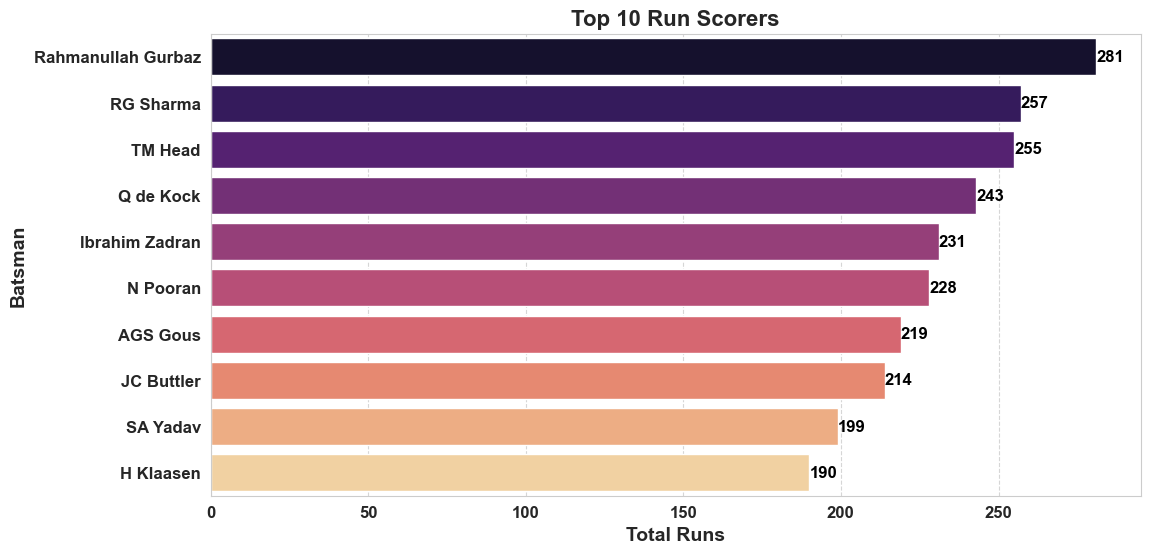

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(y=top_run_scorers.index, x=top_run_scorers.values, palette="magma")
plt.title("Top 10 Run Scorers", fontsize=16, weight='bold')
plt.xlabel("Total Runs", fontsize=14, weight='bold')
plt.ylabel("Batsman", fontsize=14, weight='bold')
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.8)

for index, value in enumerate(top_run_scorers.values):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.show()

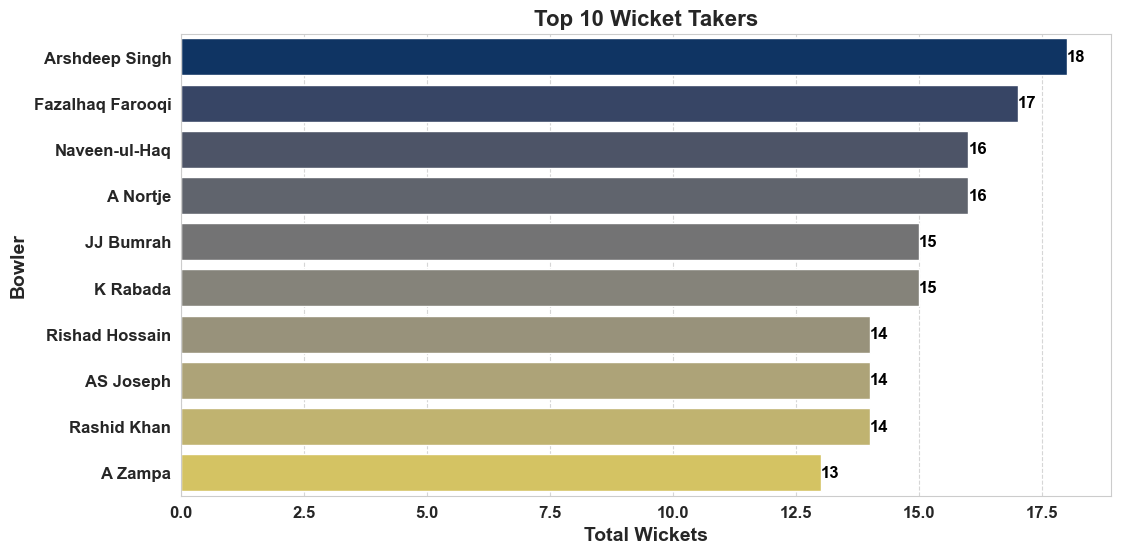

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(y=top_wicket_takers.index, x=top_wicket_takers.values, palette="cividis")
plt.title("Top 10 Wicket Takers", fontsize=16, weight='bold')
plt.xlabel("Total Wickets", fontsize=14, weight='bold')
plt.ylabel("Bowler", fontsize=14, weight='bold')
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.8)

for index, value in enumerate(top_wicket_takers.values):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.show()

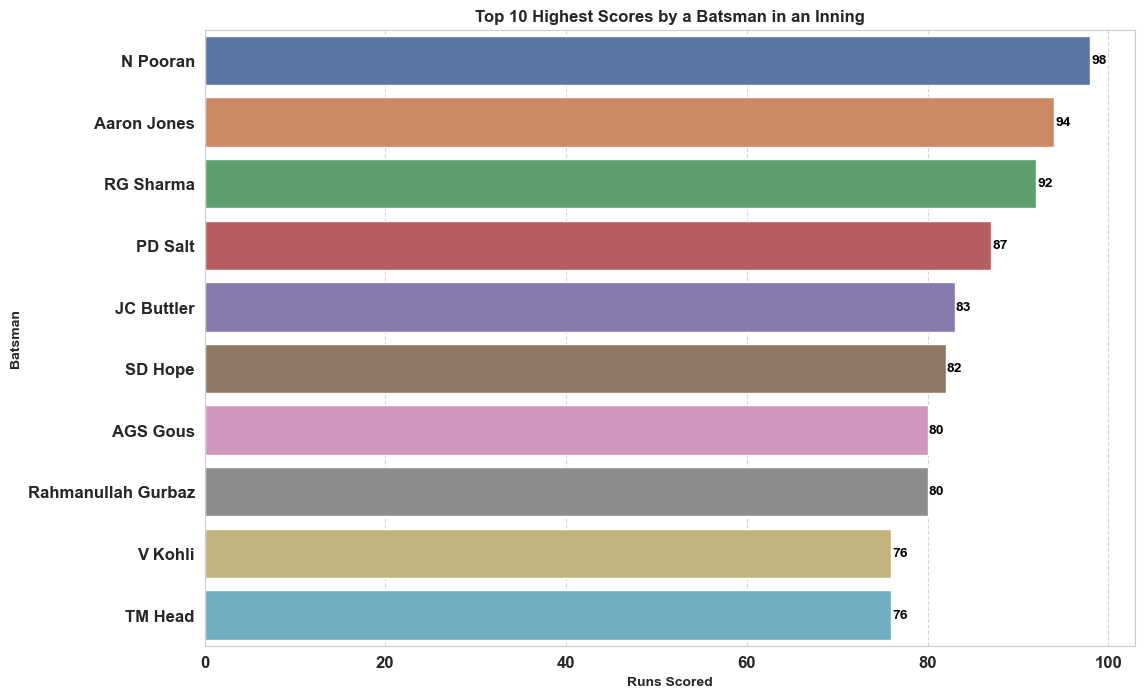

In [25]:
batsman_scores = deliveries.groupby(['match_id', 'striker'])['runs_off_bat'].sum().reset_index()

highest_score = batsman_scores.sort_values(by='runs_off_bat', ascending=False).head(1)

top_scores = batsman_scores.sort_values(by='runs_off_bat', ascending=False).head(10)

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=top_scores, x='runs_off_bat', y='striker', palette='deep')
plt.xlabel('Runs Scored', weight='bold')
plt.ylabel('Batsman', weight='bold')
plt.title('Top 10 Highest Scores by a Batsman in an Inning', weight='bold')
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.8)

for index, value in enumerate(top_scores['runs_off_bat']):
    bar_plot.text(value + 1, index, str(value), color='black', ha="center", va="center", weight='bold')

plt.show()

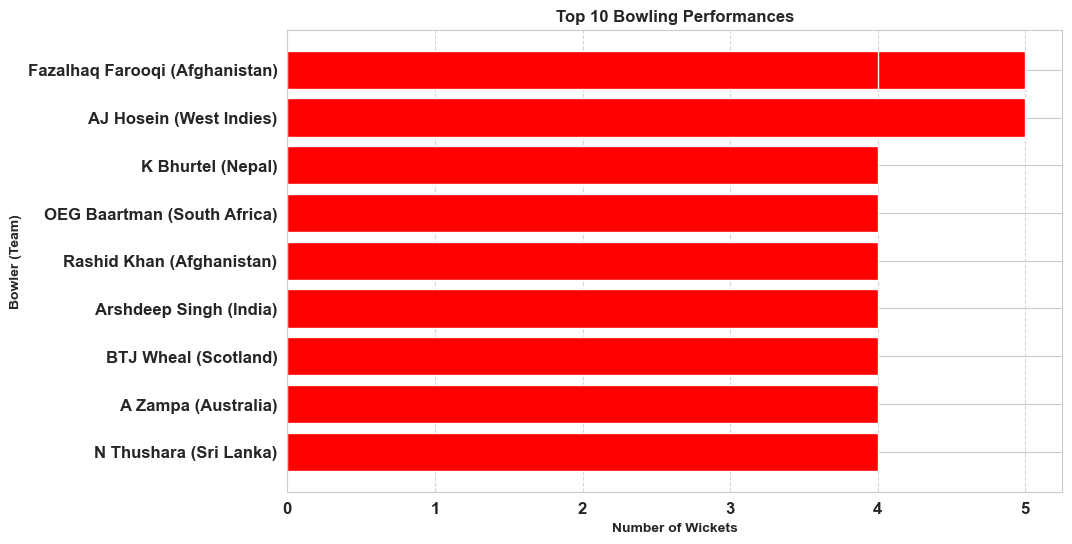

In [26]:
wickets = deliveries[deliveries['wicket_type'].notna()]

bowler_wickets = wickets.groupby(['match_id', 'bowling_team', 'venue', 'bowler']).size().reset_index(name='wickets')

top_bowling_performances = bowler_wickets.sort_values(by='wickets', ascending=False)

top_10_bowling = top_bowling_performances.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_bowling['bowler'] + " (" + top_10_bowling['bowling_team'] + ")", top_10_bowling['wickets'], color='red')
plt.xlabel('Number of Wickets', weight='bold')
plt.ylabel('Bowler (Team)', weight='bold')
plt.title('Top 10 Bowling Performances', weight='bold')
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.8)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest wicket-takers on top
plt.show()

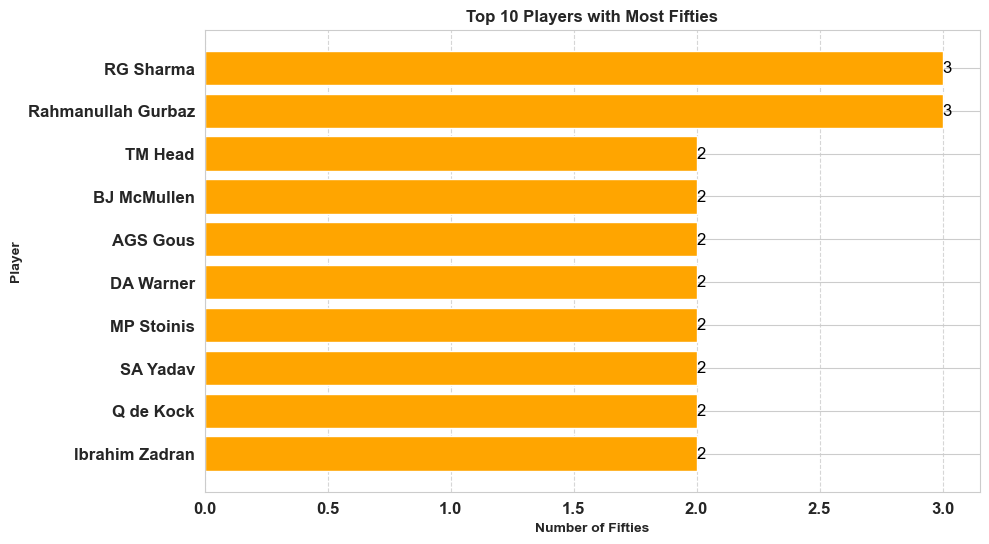

In [27]:
fifties = deliveries.groupby(['match_id', 'striker']).agg({'runs_off_bat': 'sum'}).reset_index()
fifties = fifties[(fifties['runs_off_bat'] >= 50) & (fifties['runs_off_bat'] < 100)]

player_fifties = fifties.groupby('striker').size().reset_index(name='fifties')

top_fifty_scorers = player_fifties.sort_values(by='fifties', ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_fifty_scorers['striker'], top_fifty_scorers['fifties'], color='orange')
plt.xlabel('Number of Fifties', weight='bold')
plt.ylabel('Player', weight='bold')
plt.title('Top 10 Players with Most Fifties', weight='bold')
plt.gca().invert_yaxis()
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.8)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', color='black', fontsize=12)

plt.show()

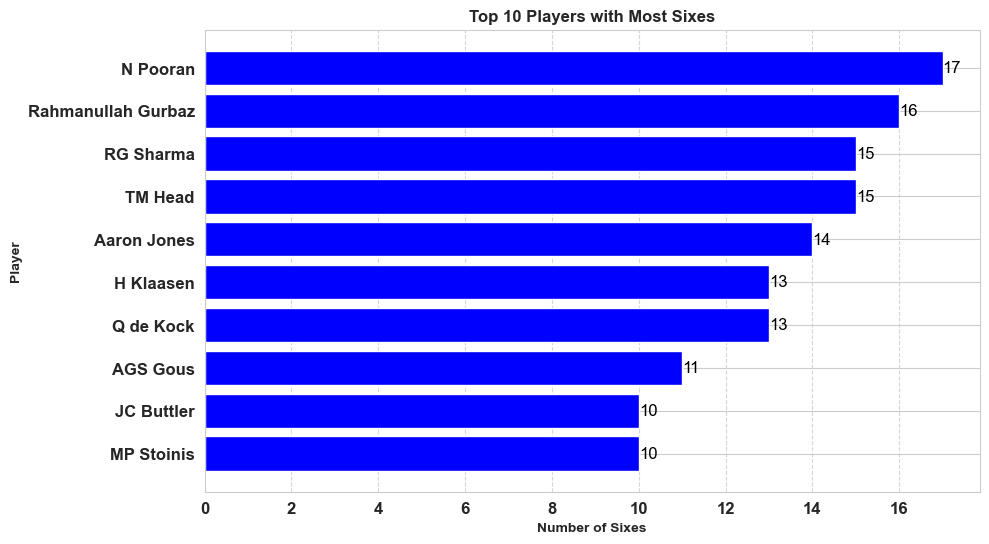

In [28]:
sixes_df = deliveries[deliveries['runs_off_bat'] == 6]

player_sixes = sixes_df.groupby('striker').size().reset_index(name='sixes')

top_six_hitters = player_sixes.sort_values(by='sixes', ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_six_hitters['striker'], top_six_hitters['sixes'], color='blue')
plt.xlabel('Number of Sixes', weight='bold')
plt.ylabel('Player', weight='bold')
plt.title('Top 10 Players with Most Sixes', weight='bold')
plt.gca().invert_yaxis()  # Invert y-axis to have the top scorer on top
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.8)

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', color='black', fontsize=12)

plt.show()

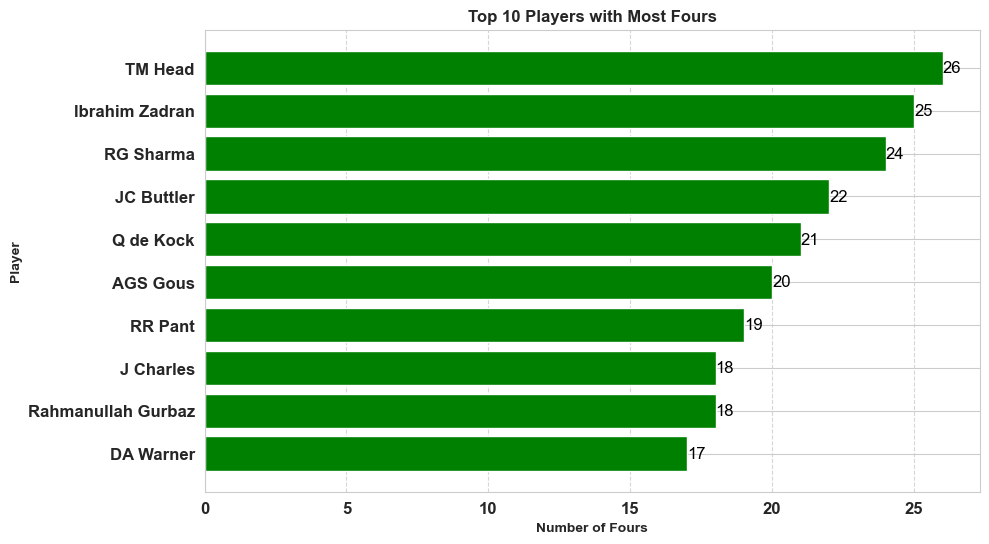

In [29]:
fours_df = deliveries[deliveries['runs_off_bat'] == 4]

player_fours = fours_df.groupby('striker').size().reset_index(name='fours')

top_fours_hitters = player_fours.sort_values(by='fours', ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_fours_hitters['striker'], top_fours_hitters['fours'], color='green')
plt.xlabel('Number of Fours', weight='bold')
plt.ylabel('Player', weight='bold')
plt.title('Top 10 Players with Most Fours', weight='bold')
plt.gca().invert_yaxis() 
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.8)

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', color='black', fontsize=12)

plt.show()

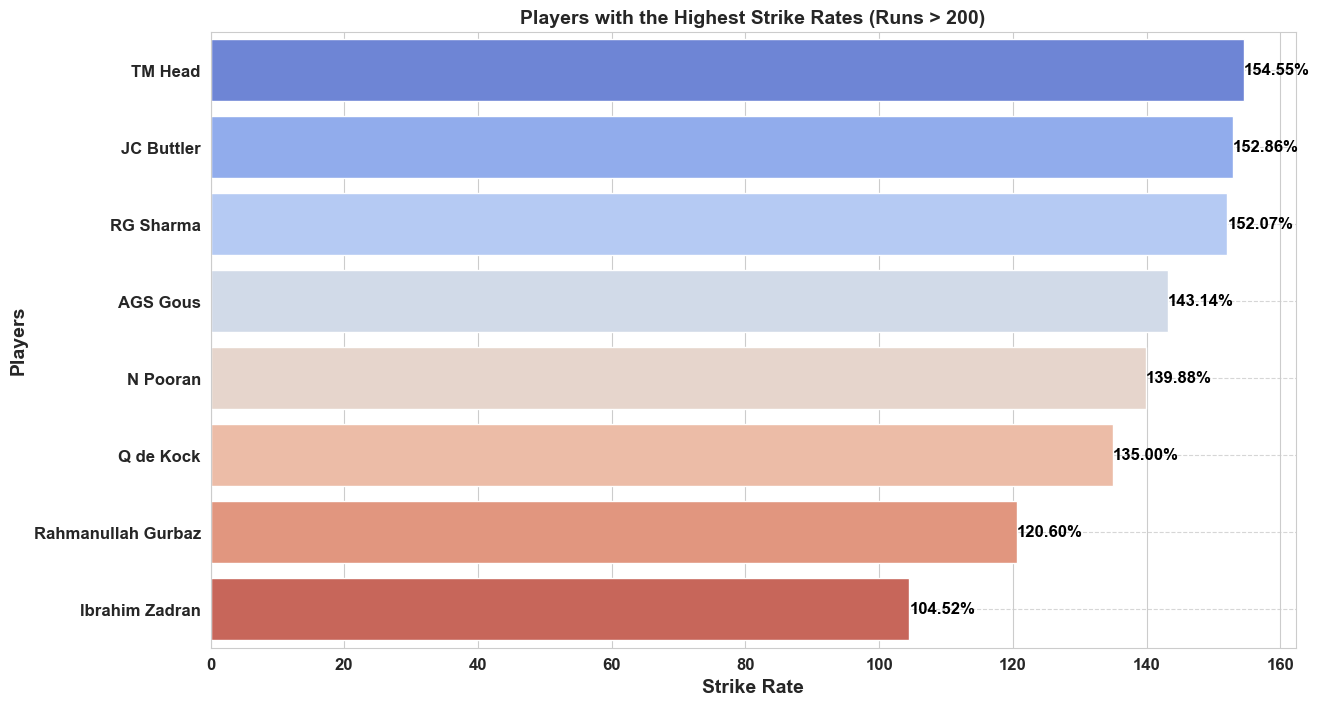

In [30]:
player_runs = deliveries.groupby('striker')['runs_off_bat'].sum()

player_balls = deliveries.groupby('striker').size()

top_strike_rate_players = (player_runs / player_balls) * 100

players_above_200_runs = player_runs[player_runs > 200]

filtered_strike_rates = top_strike_rate_players[players_above_200_runs.index]

top_strike_rate_players = filtered_strike_rates.sort_values(ascending=False)

plt.figure(figsize=(14, 8))
barplot = sns.barplot(x=top_strike_rate_players.values, y=top_strike_rate_players.index, palette='coolwarm')

for index, value in enumerate(top_strike_rate_players):
    plt.text(value, index, f'{value:.2f}%', color='black', va="center", fontsize=12, weight='bold')

plt.title('Players with the Highest Strike Rates (Runs > 200)', fontsize=14, weight='bold')
plt.xlabel('Strike Rate', fontsize=14, weight='bold')
plt.ylabel('Players', fontsize=14, weight='bold')
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.8)

plt.show()

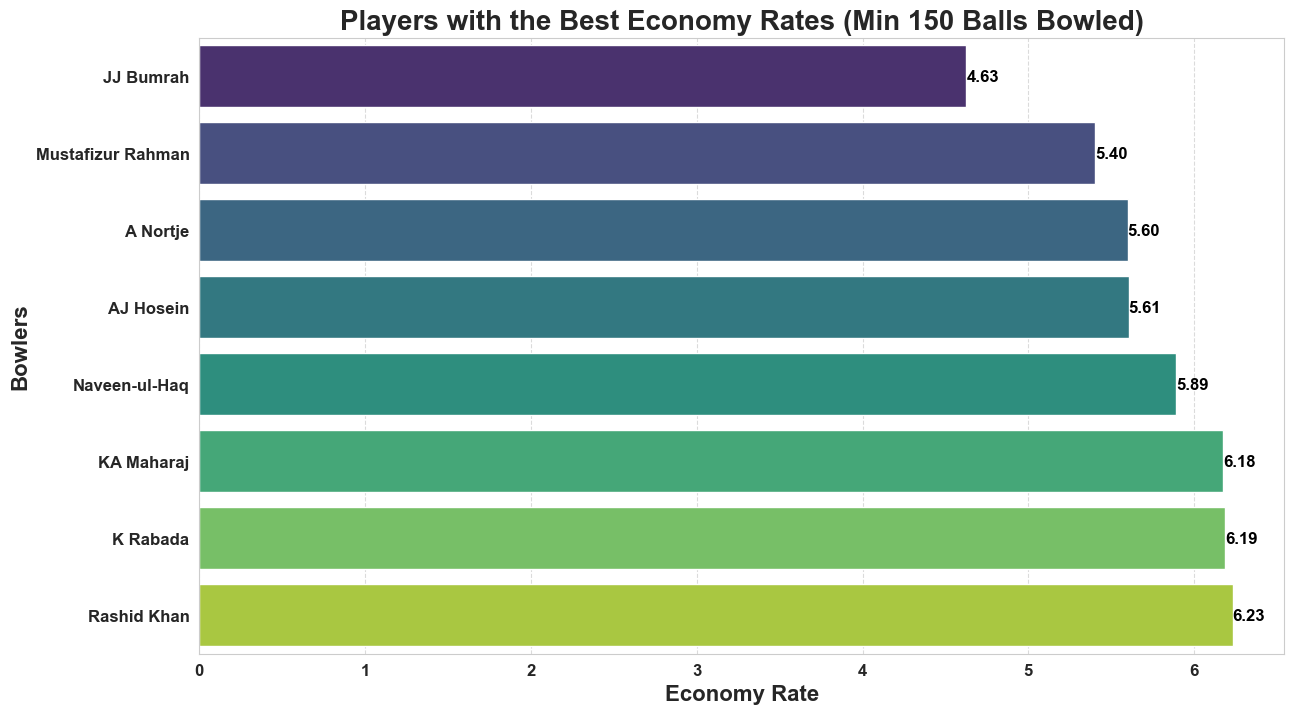

In [31]:
balls_bowled = deliveries.groupby('bowler').size()
runs_conceded = deliveries.groupby('bowler')['runs_off_bat'].sum() + deliveries.groupby('bowler')['extras'].sum()

economy_rate = (runs_conceded / (balls_bowled / 6))

filtered_economy_rate = economy_rate[balls_bowled >= 150]

best_economy_rates = filtered_economy_rate.sort_values().head(8)

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=best_economy_rates.values, y=best_economy_rates.index, palette='viridis')
plt.title('Players with the Best Economy Rates (Min 150 Balls Bowled)', fontsize=20, weight='bold')
plt.xlabel('Economy Rate', fontsize=16, weight='bold')
plt.ylabel('Bowlers', fontsize=16, weight='bold')

for index, value in enumerate(best_economy_rates.values):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

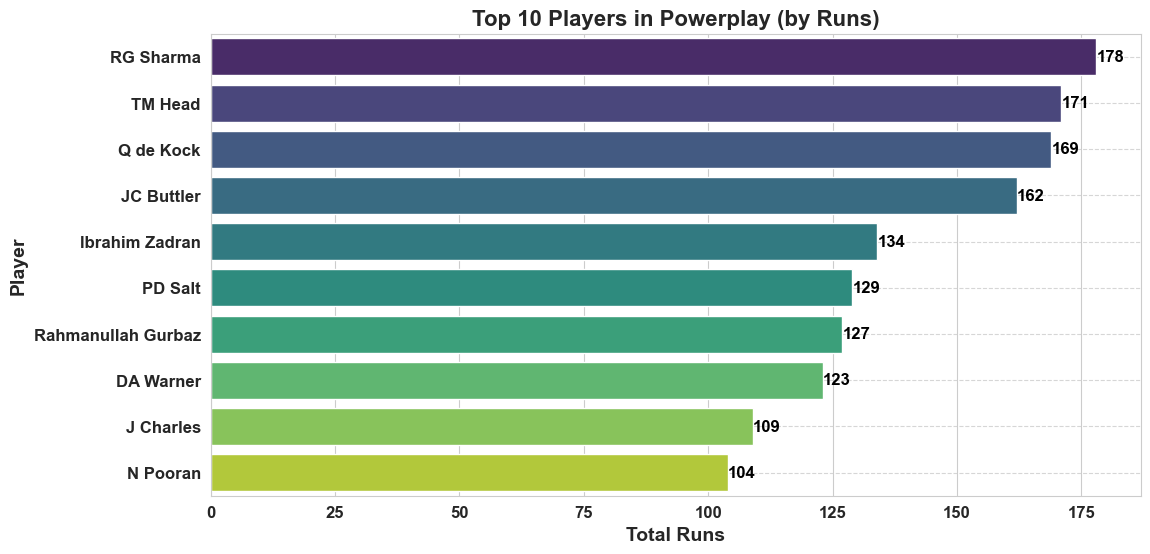

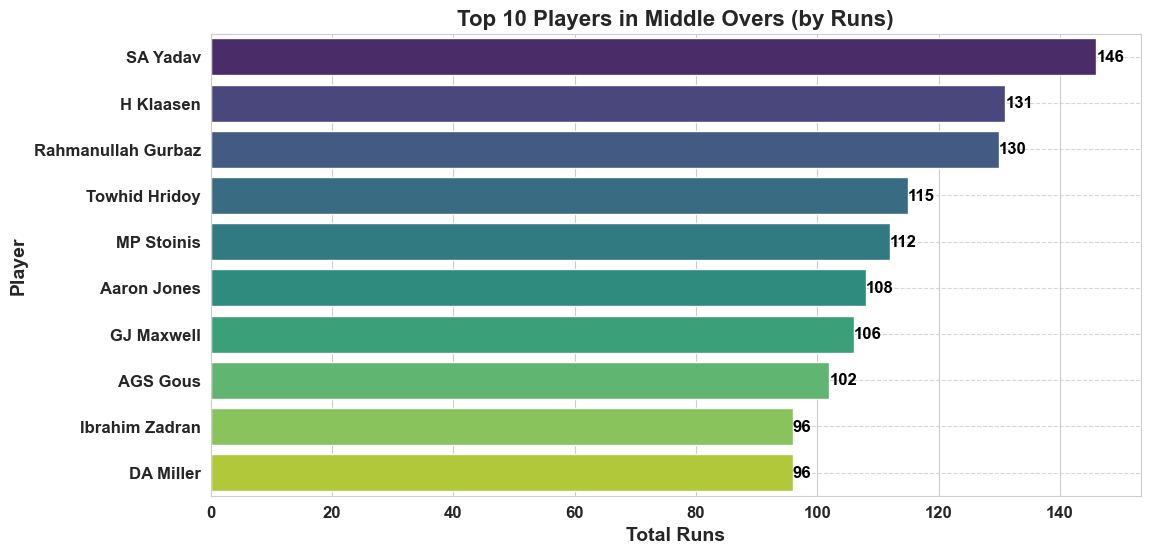

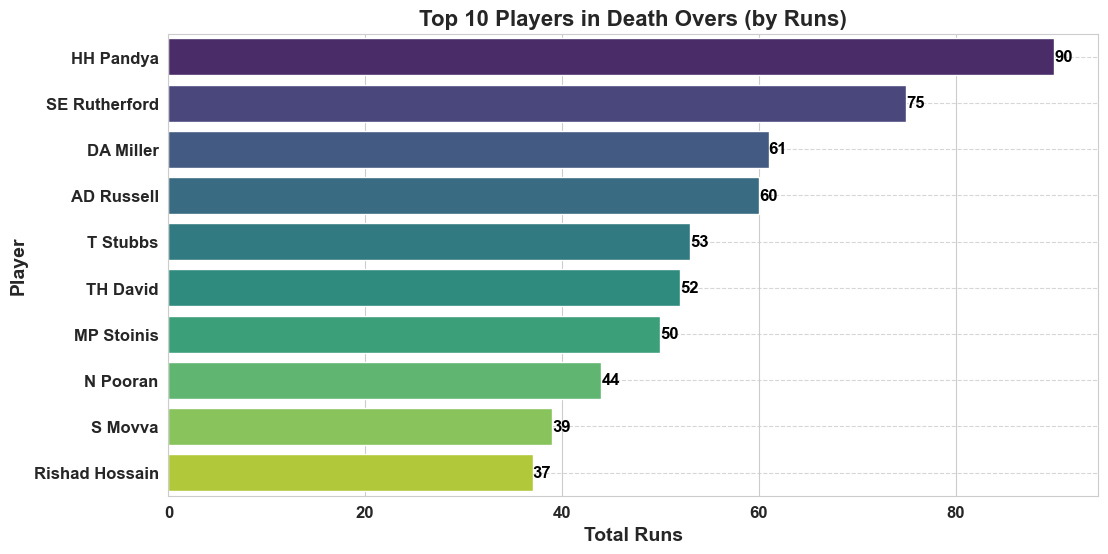

In [32]:
powerplay_filter = (deliveries['ball'] >= 0.1) & (deliveries['ball'] <= 6.6)
middle_overs_filter = (deliveries['ball'] >= 7.1) & (deliveries['ball'] <= 15.6)
death_overs_filter = (deliveries['ball'] >= 16.1) & (deliveries['ball'] <= 20.6)

powerplay = deliveries[powerplay_filter]
middle_overs = deliveries[middle_overs_filter]
death_overs = deliveries[death_overs_filter]

def top_10_players(df, phase_name):
    
    player_runs = df.groupby('striker')['runs_off_bat'].sum()
    player_balls = df.groupby('striker').size()
    
    player_strike_rate = (player_runs / player_balls) * 100
    
    player_stats = pd.DataFrame({'runs': player_runs,'strike_rate': player_strike_rate})
    
    player_stats = player_stats[player_stats['runs'] > 30]
    
    player_stats_sorted = player_stats.sort_values(by=['runs', 'strike_rate'], ascending=False).head(10)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=player_stats_sorted['runs'], y=player_stats_sorted.index, palette="viridis")
    plt.title(f"Top 10 Players in {phase_name} (by Runs)", fontsize=16, weight='bold')
    plt.xlabel("Total Runs", fontsize=14, weight='bold')
    plt.ylabel("Player", fontsize=14, weight='bold')
    plt.xticks(fontsize=12, weight='bold')
    plt.yticks(fontsize=12, weight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.8)
    
    for index, value in enumerate(player_stats_sorted['runs']):
        plt.text(value, index, f'{value}', color='black', va="center", fontsize=12, weight='bold')
    plt.show()
    
    return player_stats_sorted
   
powerplay_top_10 = top_10_players(powerplay, "Powerplay")

middle_overs_top_10 = top_10_players(middle_overs, "Middle Overs")

death_overs_top_10 = top_10_players(death_overs, "Death Overs")